# IRIS FLOWER CLASSIFICATION

The Iris flower dataset contains measurements of iris flowers' sepal and petal lengths and widths for three species: Setosa, Versicolor, and Virginica. The goal is to build a machine learning model that can predict the species of an iris flower based on these measurements. This dataset is commonly used for classification tasks to demonstrate basic machine learning concepts.

# Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [67]:
# Load the dataset
data = pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Inspecting Dataset

In [69]:
data.shape

(150, 5)

In [70]:
# to get the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Cleaning

In [73]:
# check missing value
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [74]:
# Check duplicate values
data.duplicated().sum()

3

In [75]:
# Drop duplicated values
data = data.drop_duplicates()

In [76]:
# Recheck duplicated values
data.duplicated().sum()

0

# Handling Outlier

<Axes: >

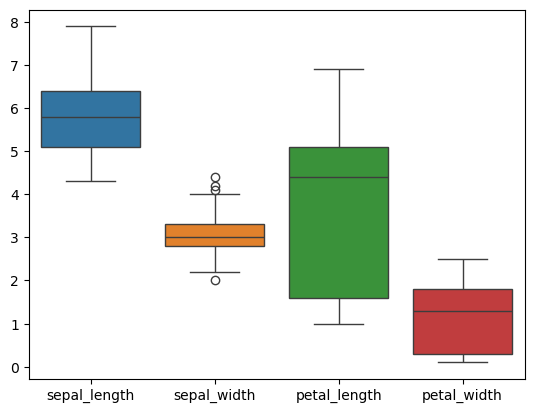

In [78]:
# Boxplot for iris data
sns.boxplot(data)

Observations :

From the boxplots, we can observe that there are outliers present in the sepal width feature

<Axes: ylabel='sepal_width'>

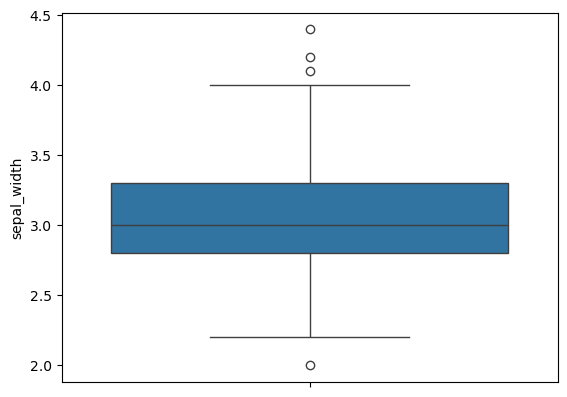

In [80]:
sns.boxplot(data['sepal_width'])

In [81]:
# Assume we already calculated IQR and identified outliers as shown before
# Remove outliers based on IQR
numerical_cols = ['sepal_width']
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

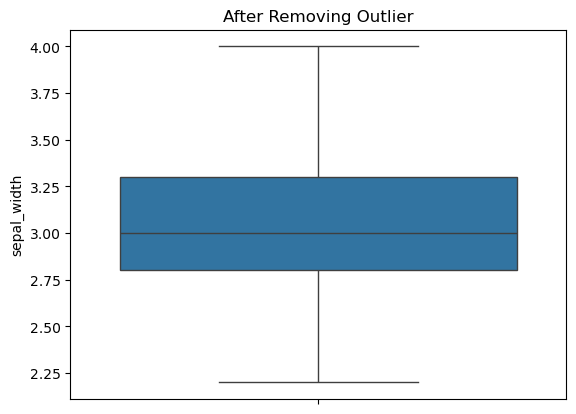

In [82]:
sns.boxplot(data['sepal_width'])
plt.title('After Removing Outlier')
plt.show()

# EDA

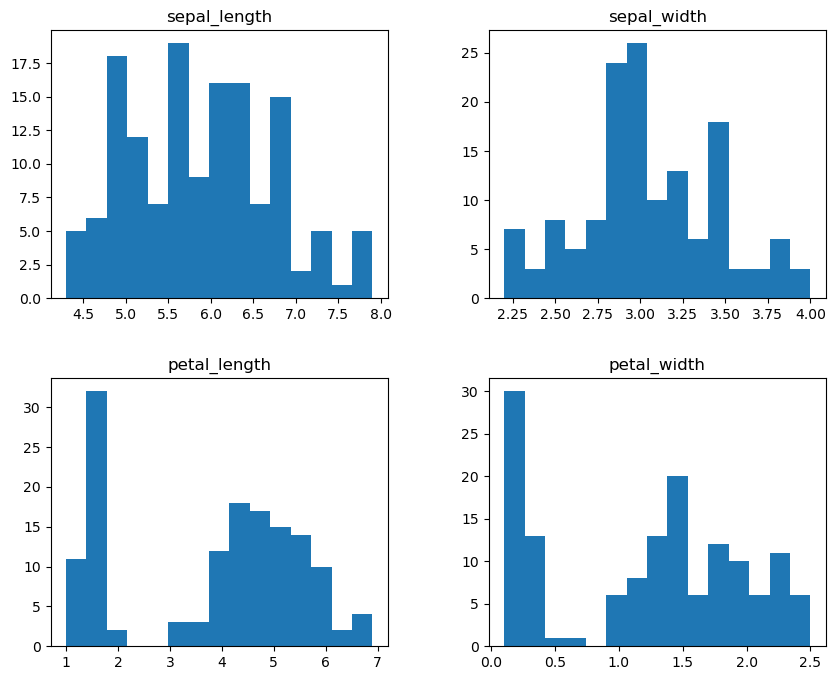

In [84]:
# Univariate analysis
data.hist(bins=15, figsize=(10, 8), grid=False)
plt.show()

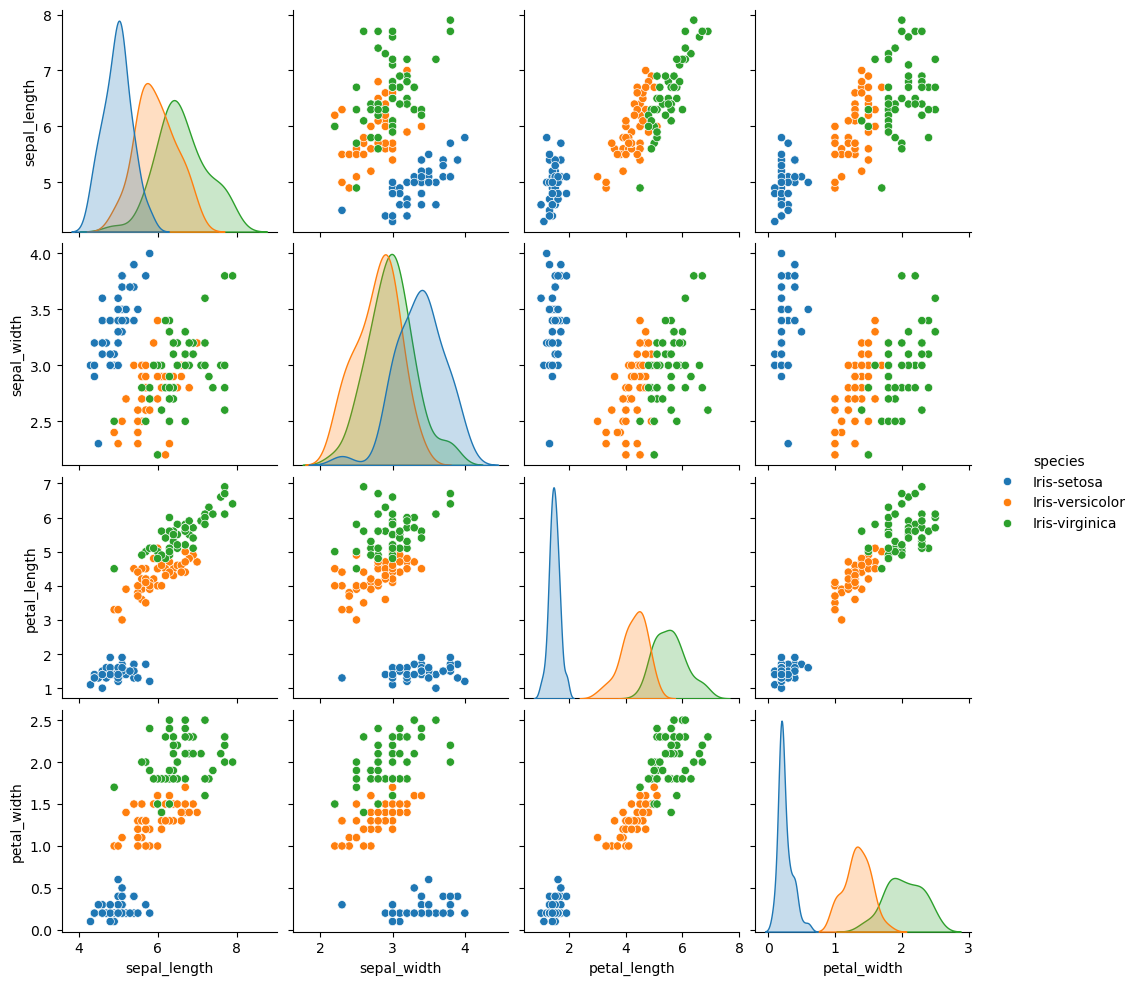

In [85]:
# Visualize the distribution of features
sns.pairplot(data, hue="species")
plt.show()

# Model Development

In [87]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = data.drop('species',axis = 1)
y = data['species']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [88]:
# choose a model
model = LogisticRegression(max_iter= 50)
model.fit(x_train,y_train)

LogisticRegression(max_iter=50)

In [89]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')

Accuracy:0.9655172413793104


In [90]:
# new flower measurement (Sepal Length, Sepal Width, Petal Length, Petal Width)
new_flower = [[5.1, 3.5, 1.4, 0.2]]

# Predict the species of the new flower
predicted_species = model.predict(new_flower)
print(f"Predicted species: {predicted_species[0]}")

Predicted species: Iris-setosa


In [91]:
new_flower_2 = [[5.2, 3.4, 5.4, 2.3]]
predicted_species_2 = model.predict(new_flower_2)
print(f'Predicted species: {predicted_species_2[0]}')

Predicted species: Iris-virginica


Prediction By Using Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
y_pred_rf = model_rf.predict(x_test)

In [95]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}%')

Random Forest Accuracy: 0.9310344827586207%


In [96]:
# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.88      0.88      0.88         8

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



In [97]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix)

Random Forest Confusion Matrix:
[[ 9  0  0]
 [ 0 11  1]
 [ 0  1  7]]
